# Testing and regularization

In [5]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
random.seed(0)

## Defining our dataset

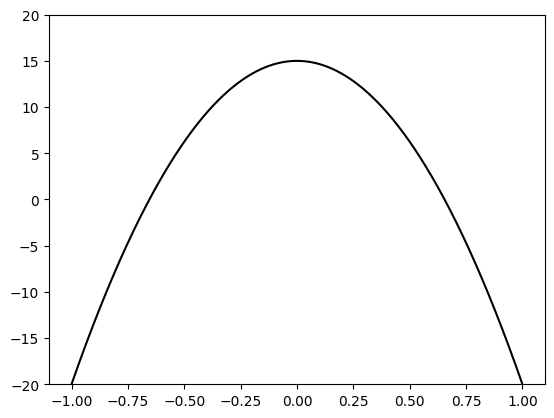

In [6]:
# Our original polynomial is -35x^2+x+15
coefs = [15,0,-35]

def polynomial(coefs, x):
    n = len(coefs)
    return sum([coefs[i]*x**i for i in range(n)])

def draw_polynomial(coefs):
    n = len(coefs)
    x = np.linspace(-1, 1, 1000)
    plt.ylim(-20,20)
    plt.plot(x, sum([coefs[i]*x**i for i in range(n)]), linestyle='-', color='black')

draw_polynomial(coefs)

In [7]:
X = []
Y = []
for i in range(40):
    x = random.uniform(-1,1)
    y = polynomial(coefs, x) + random.gauss(0,2)
    X.append(x)
    Y.append(y)
X=np.array(X)
Y=np.array(Y)

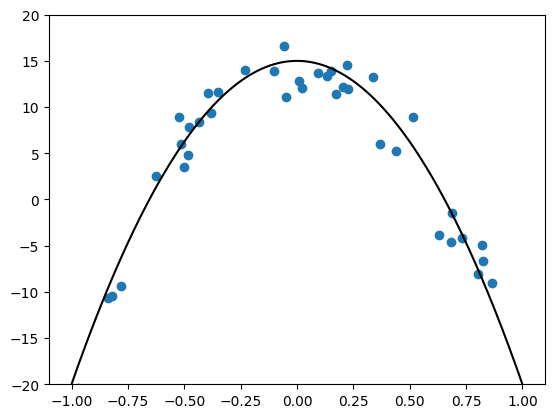

In [8]:
plt.scatter(X, Y)
draw_polynomial(coefs)

## Training a polynomial regression model

In [9]:
for datasample in zip(X,Y):
    print(datasample)

(np.float64(0.6888437030500962), np.float64(-1.503313676546703))
(np.float64(-0.4821664994140733), np.float64(4.776223391096098))
(np.float64(0.02254944273721704), np.float64(12.087957039273702))
(np.float64(-0.3933745478421451), np.float64(11.552655381342872))
(np.float64(-0.04680609169528838), np.float64(11.13939451533042))
(np.float64(0.009373711634780513), np.float64(12.810729063756577))
(np.float64(-0.43632431120059234), np.float64(8.437955069843738))
(np.float64(-0.4989873172751189), np.float64(3.511211911084044))
(np.float64(0.8194925119364802), np.float64(-4.879955934160179))
(np.float64(0.8043319008791654), np.float64(-8.0368585173616))
(np.float64(-0.37970486136133474), np.float64(9.412786903432224))
(np.float64(0.36796786383088254), np.float64(6.014161594638752))
(np.float64(-0.055714569094573285), np.float64(16.612588226930765))
(np.float64(0.2217739468876032), np.float64(14.540743210654112))
(np.float64(0.8260221064757964), np.float64(-6.653701461777612))
(np.float64(0.730

### Adding columns to our dataset corresponding to $x^2, x^3, \ldots, x^{200}$

In [13]:
from sklearn.preprocessing import PolynomialFeatures
def addPoly(X,polyDegree):
    ## TODO ##
    #use sklearn (PolynomialFeatures method)
    X = X.reshape(-1,1)
    poly = PolynomialFeatures(degree=polyDegree,include_bias=False)
    X = poly.fit_transform(X)
    return X
X_poly=addPoly(X,200)

In [14]:
print(X_poly.shape)
print(X_poly[0,:])

(40, 200)
[6.88843703e-01 4.74505647e-01 3.26860227e-01 2.25155609e-01
 1.55097024e-01 1.06837608e-01 7.35944136e-02 5.06950484e-02
 3.49209649e-02 2.40550867e-02 1.65701950e-02 1.14142745e-02
 7.86265112e-03 5.41613771e-03 3.73087236e-03 2.56998793e-03
 1.77032000e-03 1.21947379e-03 8.40026839e-04 5.78647198e-04
 3.98597479e-04 2.74571363e-04 1.89136755e-04 1.30285662e-04
 8.97464582e-05 6.18212826e-05 4.25852012e-05 2.93345477e-05
 2.02069185e-05 1.39194085e-05 9.58829693e-06 6.60483796e-06
 4.54970104e-06 3.13403291e-06 2.15885884e-06 1.48711632e-06
 1.02439071e-06 7.05645090e-07 4.86079177e-07 3.34832580e-07
 2.30647314e-07 1.58879950e-07 1.09443453e-07 7.53894335e-08
 5.19315366e-08 3.57727120e-08 2.46418074e-08 1.69743538e-08
 1.16926768e-08 8.05442676e-09 5.54824115e-09 3.82187098e-09
 2.63267176e-09 1.81349936e-09 1.24921762e-09 8.60515689e-10
 5.92760814e-10 4.08319554e-10 2.81268354e-10 1.93749934e-10
 1.33463422e-10 9.19354380e-11 6.33291475e-11 4.36238845e-11
 3.00500381e-1

## Splitting data into training and testing

In [15]:
from sklearn.model_selection import train_test_split
## TODO ##
# use sklearn (train_test_split) to split data to 80% training 20% testing
X_train, X_test, y_train, y_test = train_test_split(X_poly,Y,test_size=0.2)

In [16]:
from sklearn.metrics import mean_squared_error
def display_results(model):
    coefs = [model.intercept_]
    coefs += list(model.coef_)
    ytrain_predict=model.predict(X_train)
    ytest_predict=model.predict(X_test)
    train_error=np.sqrt(mean_squared_error(y_train,ytrain_predict))
    test_error=np.sqrt(mean_squared_error(y_test,ytest_predict))
    print("Training error (rmse):", train_error)
    print("Testing error (rmse):", test_error)
    plt.scatter(X_train[:,0], y_train, marker='o')
    plt.scatter(X_test[:,0], y_test, marker='^')
    draw_polynomial(coefs)
    plt.show()
    print("Polynomial coefficients")
    print(coefs)

## Training a polynomial regression model with no regularization

In [17]:
from sklearn.linear_model import LinearRegression
## TODO ##
# use sklearn linear regression to fit the data

model_no_reg = LinearRegression()
model_no_reg.fit(X_poly,Y)

LinearRegression()

Training error (rmse): 0.7626445580487514
Testing error (rmse): 1.106384400600493


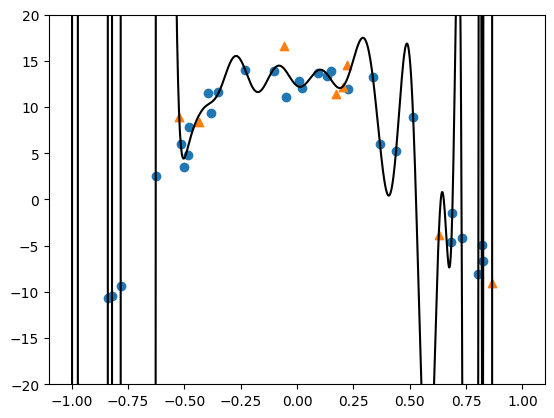

Polynomial coefficients
[np.float64(12.303913308525576), np.float64(-16.20797479700702), np.float64(554.2924105348735), np.float64(2364.016183144685), np.float64(-53211.31063569102), np.float64(-95278.46227128929), np.float64(1898815.9295736682), np.float64(1276875.9034587652), np.float64(-33910827.00418797), np.float64(3993282.280094451), np.float64(354263558.89631796), np.float64(-277361333.6429035), np.float64(-2342140089.4281945), np.float64(3126248754.5570726), np.float64(10013980875.445395), np.float64(-17514867971.05711), np.float64(-26783053781.535652), np.float64(53929578159.68858), np.float64(39573010498.20609), np.float64(-83221821911.9784), np.float64(-19049340202.279564), np.float64(29028999010.991764), np.float64(-16879543051.923874), np.float64(63422251038.4861), np.float64(5382676021.221664), np.float64(-12732957509.282194), np.float64(11654297046.88166), np.float64(-59923127750.55605), np.float64(9598177241.91848), np.float64(-35972707026.68143), np.float64(6208391845.

In [18]:
display_results(model_no_reg)

## Training a polynomial regression model with L1 regularization

In [19]:
from sklearn import linear_model
## TODO ##
# use sklearn Lasso (linear regression with L1 Norm) to fit the data

model_L1_reg = linear_model.Lasso()
model_L1_reg.fit(X_poly,Y)

Lasso()

Training error (rmse): 4.20084460000162
Testing error (rmse): 4.026894506823435


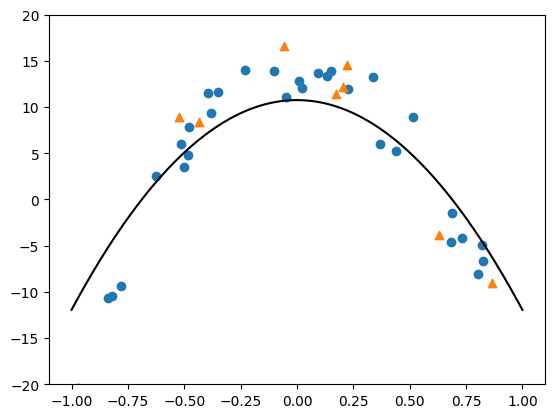

Polynomial coefficients
[np.float64(10.755825840913214), np.float64(0.0), np.float64(-22.70561390033872), np.float64(0.0), np.float64(-0.0), np.float64(0.0), np.float64(-0.0), np.float64(0.0), np.float64(-0.0), np.float64(0.0), np.float64(-0.0), np.float64(0.0), np.float64(-0.0), np.float64(0.0), np.float64(-0.0), np.float64(0.0), np.float64(-0.0), np.float64(0.0), np.float64(-0.0), np.float64(0.0), np.float64(-0.0), np.float64(0.0), np.float64(-0.0), np.float64(0.0), np.float64(-0.0), np.float64(0.0), np.float64(-0.0), np.float64(0.0), np.float64(-0.0), np.float64(0.0), np.float64(-0.0), np.float64(0.0), np.float64(-0.0), np.float64(0.0), np.float64(-0.0), np.float64(0.0), np.float64(-0.0), np.float64(0.0), np.float64(-0.0), np.float64(0.0), np.float64(-0.0), np.float64(0.0), np.float64(-0.0), np.float64(0.0), np.float64(-0.0), np.float64(0.0), np.float64(-0.0), np.float64(0.0), np.float64(-0.0), np.float64(0.0), np.float64(-0.0), np.float64(0.0), np.float64(-0.0), np.float64(0.0), np

In [20]:
display_results(model_L1_reg)

## Training a polynomial regression model with L2 regularization

In [21]:
from sklearn import linear_model
## TODO ##
# use sklearn Ridge (linear regression with L2 Norm) to fit the data

model_L2_reg = linear_model.Ridge()
model_L2_reg.fit(X_poly,Y)

Ridge()

Training error (rmse): 2.6429189100380266
Testing error (rmse): 3.508282373148488


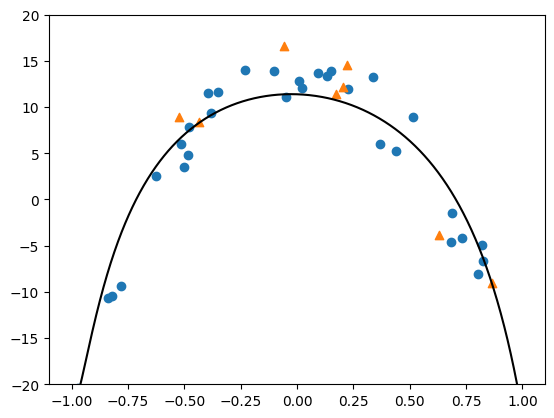

Polynomial coefficients
[np.float64(11.387318979547274), np.float64(-0.8375703986826024), np.float64(-16.11094248854294), np.float64(0.3459587592896553), np.float64(-9.303656753615183), np.float64(0.8960060181081291), np.float64(-5.23812391316074), np.float64(0.8585731946854892), np.float64(-2.973392502591715), np.float64(0.6392356454653596), np.float64(-1.679533475492544), np.float64(0.40365574655569475), np.float64(-0.920494511260995), np.float64(0.20715218674179614), np.float64(-0.46649616076750566), np.float64(0.06030488857334473), np.float64(-0.19188364003164968), np.float64(-0.04237135364668002), np.float64(-0.025406748639873022), np.float64(-0.11045808881166877), np.float64(0.07462067433327446), np.float64(-0.15312896774592932), np.float64(0.13323391336205423), np.float64(-0.17781402167336227), np.float64(0.16579252169426262), np.float64(-0.1900934388028965), np.float64(0.18188184101946095), np.float64(-0.19399138701511104), np.float64(0.1875640135416428), np.float64(-0.19234098

In [22]:
display_results(model_L2_reg)

## Viewing the predictions in the testing set

In [23]:
import pandas as pd
from IPython.display import display
predictions={}
predictions ['x']=X_test[:,0]
predictions ['y']=y_test
predictions['No reg'] = model_no_reg.predict(X_test)
predictions['L1 reg'] = model_L1_reg.predict(X_test)
predictions['L2 reg'] = model_L2_reg.predict(X_test)
predictions=pd.DataFrame.from_dict(predictions)
display(predictions)

,x,y,No reg,L1 reg,L2 reg
0,-0.055715,16.612588,14.108708,10.685345,11.383824
1,0.175234,11.390800,12.223791,10.058605,10.738916
2,0.628934,-3.833775,-3.832463,1.774447,2.834912
3,0.206371,12.218877,12.304734,9.788814,10.514418
4,0.221774,14.540743,12.986490,9.639080,10.390303
5,-0.436324,8.437955,9.034802,6.433156,8.261960
6,0.865668,-9.073495,-9.073481,-6.259318,-9.164803
7,-0.522768,8.966297,9.190125,4.550687,6.505119


### Real Example (Predict fuel efficiency)

In [24]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [25]:
#### Get data

url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']

raw_dataset = pd.read_csv(url, names=column_names,
                          na_values='?', comment='\t',
                          sep=' ', skipinitialspace=True)

dataset = raw_dataset.copy()

#### Clean data

dataset.isna().sum()

dataset = dataset.dropna()

dataset.isna().sum()

dataset.head()

dataset['Origin'] = dataset['Origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})

dataset = pd.get_dummies(dataset, columns=['Origin'], prefix='', prefix_sep='')

dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
0,18.0,8,307.0,130.0,3504.0,12.0,70,False,False,True
1,15.0,8,350.0,165.0,3693.0,11.5,70,False,False,True
2,18.0,8,318.0,150.0,3436.0,11.0,70,False,False,True
3,16.0,8,304.0,150.0,3433.0,12.0,70,False,False,True
4,17.0,8,302.0,140.0,3449.0,10.5,70,False,False,True


In [26]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

#### using 50th order

In [27]:
from sklearn import preprocessing

X_train=train_dataset[['Horsepower']]
y_train=train_dataset[['MPG']]

X_test=test_dataset[['Horsepower']]
y_test=test_dataset[['MPG']]

from sklearn.preprocessing import PolynomialFeatures
def addPoly(X,polyDegree):
    poly = PolynomialFeatures(polyDegree,include_bias=False)
    X=poly.fit_transform(X)
    return X

X_trainPoly=addPoly(X_train,50)
X_testPoly=addPoly(X_test,50)
scaler=preprocessing.StandardScaler().fit(X_trainPoly)

X_trainPoly=scaler.transform(X_trainPoly)
X_testPoly=scaler.transform(X_testPoly)

##### no regularization

In [28]:
# no regularization
from sklearn.linear_model import LinearRegression
model_no_reg = LinearRegression()
model_no_reg.fit(X_trainPoly, y_train)
ytest_predict=model_no_reg.predict(X_testPoly)
test_error=np.sqrt(mean_squared_error(y_test,ytest_predict))
print(test_error)

3063.237670340102


##### lasso regularization

In [29]:
# lasso regularization
from sklearn import linear_model
model_L1_reg = linear_model.Lasso(alpha=0.5)
model_L1_reg.fit(X_trainPoly, y_train)
ytest_predict=model_L1_reg.predict(X_testPoly)
test_error=np.sqrt(mean_squared_error(y_test,ytest_predict))
print(test_error)

4.383251699910778


##### ridge regularization

In [30]:
# ridge regularization
from sklearn import linear_model
model_L2_reg = linear_model.Ridge(alpha=0.5)
model_L2_reg.fit(X_trainPoly, y_train)
ytest_predict=model_L2_reg.predict(X_testPoly)
test_error=np.sqrt(mean_squared_error(y_test,ytest_predict))
print(test_error)

4.210997782920252
